In [1]:
# project: p1
# submitter: tzhao86
# partner: none
# hours: 10

In [2]:
#q1
type(7/2)

float

In [3]:
#q2
x = 4
maximum = 10
minimum = 5
error = x < minimum  or x > maximum  # True if x is outside the minimum-to-maximum range
error

True

In [4]:
#q3
word = "KAFKAESQUE"
suffix_match = word.lower()[-5:] == "esque" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [5]:
def add(x, y=1):
    return x+y

In [6]:
#q4
add(3, 4)

7

In [7]:
#q5
add(9)

10

In [8]:
#q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)
def smart_count(nums):
    sum = 0
    for num in nums :
        if num > 10: continue
        if num < 0: break
        sum = sum + num
    return sum

3
4
1
6


In [10]:
#q7
smart_count(nums)

14

In [11]:
#q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [12]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]


In [13]:
#q9
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [14]:
#q10
rows[0][-1]['x']

8

In [15]:
#q11
import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#q12
index = header.index("B")
sum = 0
for row in rows:
    sum = sum + row[index]
sum

10007

In [17]:
#q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [18]:
#q14
import json
f = open("usd.json")
data = json.load(f)
f.close()
Euros = 400 * data['eur']['rate']
Euros

338.712265234992

In [19]:
def divide(x, y):
    try:
        result = x/y
    except ZeroDivisionError:
        return float("nan")
    return result

In [20]:
#q15
divide(3, 2)

1.5

In [21]:
#q16
divide(-3, 0)

nan

In [22]:
#q17
import os, pandas, csv
files = os.listdir("home-computers")
years = {}
for file in files:
    year = int(file[file.index('Y')+1 : file.index('.')])
    f = open("home-computers/" + file)
    years[year] = pandas.read_csv("home-computers/" + file, skiprows = [0])
    f.close()
sorted(years.keys())

[2013, 2014, 2015, 2016, 2017, 2018]

In [23]:
#q18
df = years[2018]
area_series = df['Geographic Area Name']
wis_index = area_series[area_series == 'Wisconsin'].keys()[0]
df['Estimate!!Total'][wis_index]

2371960

In [24]:
#q19
df = years[2018]
df["Estimate!!Total!!No Computer"].sum()

10285814

In [25]:
#q20
df = years[2018]
margin_of_error = df["Margin of Error!!Total!!No Computer"]
total_estimate = df["Estimate!!Total!!No Computer"]
fraction = margin_of_error/total_estimate
fraction.max()

0.12375641594322287

In [26]:
#q21
state_list = ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
state_computer_info = {}
for state in state_list:
    state_index = area_series[area_series == state].keys()[0]
    state_percentage = df['Estimate!!Total!!No Computer'][state_index]/df['Estimate!!Total'][state_index]*100
    state_computer_info[state] = state_percentage
state_computer_info    

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

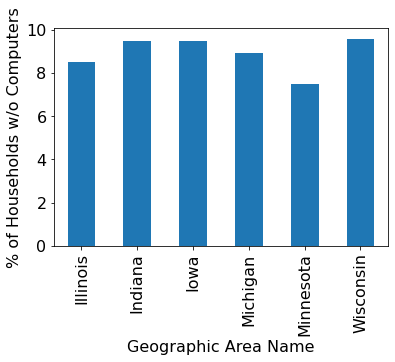

In [27]:
#q22
series_info = pandas.Series(state_computer_info)
info_plot = series_info.plot.bar(fontsize=16)
info_plot.set_xlabel("Geographic Area Name", fontdict={'fontsize':16})
info_plot.set_ylabel("% of Households w/o Computers", fontdict={'fontsize':16})
info_plot

<AxesSubplot:xlabel='Year', ylabel='WI Households without\n Computers (thousands)'>

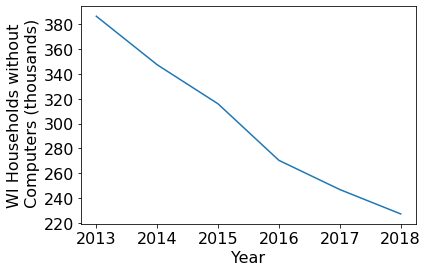

In [28]:
#q23
wis_computer_info = {}
for year in sorted(years.keys()):
    df = years[year]
    area_series = df['Geographic Area Name']
    wis_index = area_series[area_series == 'Wisconsin'].keys()[0]
    wis_computer_info[year] = df["Estimate!!Total!!No Computer"][wis_index]/1000
series_info = pandas.Series(wis_computer_info)
info_plot = series_info.plot.line(fontsize=16)
info_plot.set_xlabel("Year", fontdict={'fontsize':16})
info_plot.set_ylabel("WI Households without\n Computers (thousands)", fontdict={'fontsize':16})
info_plot

Text(0, 0.5, 'Tablets (millions)')

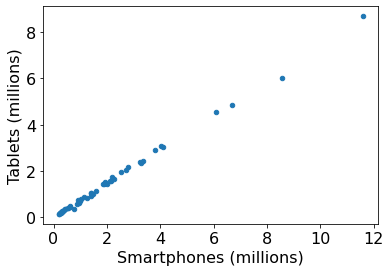

In [29]:
#q24
df = years[2018]
column_tablets = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"
column_smartphones = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone"
df[column_tablets] = df[column_tablets]/1000000
df[column_smartphones] = df[column_smartphones]/1000000
plot = df.plot.scatter(x=column_smartphones, y=column_tablets, fontsize=16)
plot.set_xlabel("Smartphones (millions)", fontdict={'fontsize':16})
plot.set_ylabel("Tablets (millions)", fontdict={'fontsize':16})

In [30]:
from subprocess import check_output

In [31]:
#q25
git_log_output = str(check_output(["git", "log"], cwd = "cs320-p1"), "utf-8").splitlines()
check_output(["git", "checkout", 'main'], cwd = "cs320-p1")
git_log_output[0]

Already on 'main'


'commit 4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'

In [32]:
#q26
commit_numbers = []
for line in git_log_output:
    if (line.find("commit") == 0):
        commit_numbers.append(line.split()[1])
commit_numbers

['4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4',
 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4',
 'c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5',
 'f37e610ce055a3d894baac2d9449e6eb77c72320',
 '6f5ca9327e986315ffcacddce5d9d6195c0913b7',
 '761627a3ad9ee681f27211326e9149f01764ceee',
 'b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9',
 '6d7beafb8e79b7a92fed8e67673a33bb7f607dbe']

In [33]:
#q27
commit_info = {}
for commit in commit_numbers:
    check_output(["git", "checkout", commit], cwd = "cs320-p1")
    f = open("cs320-p1/wc.py")
    lines = list(f)
    f.close()
    check_output(["git", "checkout", 'main'], cwd = "cs320-p1")
    commit_info[commit] = len(lines)
commit_info

Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
Switched to branch 'main'
Note: switching to 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain comm

{'4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4': 43,
 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4': 40,
 'c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5': 40,
 'f37e610ce055a3d894baac2d9449e6eb77c72320': 40,
 '6f5ca9327e986315ffcacddce5d9d6195c0913b7': 39,
 '761627a3ad9ee681f27211326e9149f01764ceee': 35,
 'b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9': 35,
 '6d7beafb8e79b7a92fed8e67673a33bb7f607dbe': 21}

In [34]:
f = open("input.txt", "w")
f.write("A B C C")
f.close()

In [35]:
#q28
import json
check_output(["git", "checkout", commit_numbers[0]], cwd = "cs320-p1")
output = json.loads(str(check_output(["python3", "cs320-p1/wc.py", "input.txt", "ALL"]), "utf-8"))
check_output(["git", "checkout", 'main'], cwd = "cs320-p1")
output

Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
Switched to branch 'main'


{'A': 1, 'B': 1, 'C': 2}

In [36]:
#q29
fail_commits = []
for commit in commit_numbers:
    try: 
        check_output(["git", "checkout", commit], cwd = "cs320-p1")
        check_output(["python3", "cs320-p1/wc.py", "input.txt", "ALL"])
        check_output(["git", "checkout", 'main'], cwd = "cs320-p1")
    except:
        fail_commits.append(commit)
        check_output(["git", "checkout", 'main'], cwd = "cs320-p1")
fail_commits

Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
Switched to branch 'main'
Note: switching to 'f637df3f45bc389e1035cc3aadcf5d81a55f0dc4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain comm

['f637df3f45bc389e1035cc3aadcf5d81a55f0dc4']

Note: switching to '4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4e41283 only make one pass over list to count all
Switched to branch 'main'


Text(0, 0.5, 'Milliseconds')

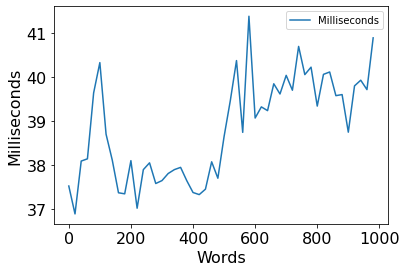

In [37]:
#q30
import time
f = open("input.txt", "w")
f.write("")
f.close()
check_output(["git", "checkout", "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4"], cwd = "cs320-p1")
input_size = []
time_used = []
for word in range(0,1000):
    f = open("input.txt", "a+")
    f.write(str(word) + "\n")
    f.close()
    if(word % 20 != 0): continue
    start_time = time.time()
    check_output(["python3", "cs320-p1/wc.py", "input.txt", "ALL"])
    time_used.append((time.time() - start_time) * 1000)
    input_size.append(word)
check_output(["git", "checkout", 'main'], cwd = "cs320-p1")
input_series = pandas.Series(input_size)
time_series = pandas.Series(time_used)
frame = {'Words': input_series, 'Milliseconds': time_series }
df = pandas.DataFrame(frame)
plot = df.plot.line(x = 'Words', fontsize = 16)
plot.set_xlabel('Words', fontdict={'fontsize':16})
plot.set_ylabel('Milliseconds', fontdict={'fontsize':16}) 

Note: switching to 'f37e610ce055a3d894baac2d9449e6eb77c72320'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f37e610 do not repeatedly re-read file, use with to automatically close
Previous HEAD position was f37e610 do not repeatedly re-read file, use with to automatically close
Switched to branch 'main'


Text(0, 0.5, 'Milliseconds')

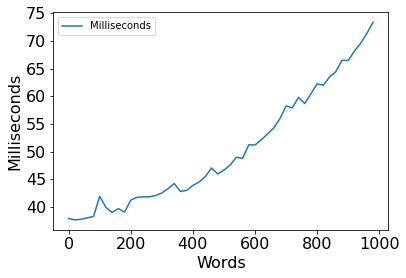

In [38]:
#q31
f = open("input.txt", "w")
f.write("")
f.close()
check_output(["git", "checkout", "f37e610ce055a3d894baac2d9449e6eb77c72320"], cwd = "cs320-p1")
input_size = []
time_used = []
for word in range(0,1000):
    f = open("input.txt", "a+")
    f.write(str(word) + "\n")
    f.close()
    if(word % 20 != 0): continue
    start_time = time.time()
    check_output(["python3", "cs320-p1/wc.py", "input.txt", "ALL"])
    time_used.append((time.time() - start_time) * 1000)
    input_size.append(word)
check_output(["git", "checkout", 'main'], cwd = "cs320-p1")
input_series = pandas.Series(input_size)
time_series = pandas.Series(time_used)
frame = {'Words': input_series, 'Milliseconds': time_series }
df = pandas.DataFrame(frame)
plot = df.plot.line(x = 'Words', fontsize = 16)
plot.set_xlabel('Words', fontdict={'fontsize':16})
plot.set_ylabel('Milliseconds', fontdict={'fontsize':16}) 

Note: switching to '6f5ca9327e986315ffcacddce5d9d6195c0913b7'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 6f5ca93 ignore case, usage line
Previous HEAD position was 6f5ca93 ignore case, usage line
Switched to branch 'main'


Text(0, 0.5, 'Milliseconds')

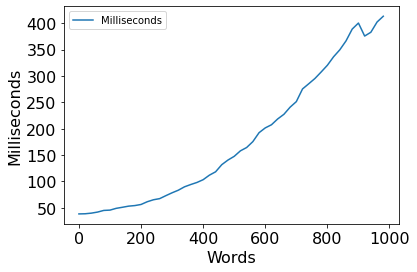

In [39]:
#q32
f = open("input.txt", "w")
f.write("")
f.close()
check_output(["git", "checkout", "6f5ca9327e986315ffcacddce5d9d6195c0913b7"], cwd = "cs320-p1")
input_size = []
time_used = []
for word in range(0,1000):
    f = open("input.txt", "a+")
    f.write(str(word) + "\n")
    f.close()
    if(word % 20 != 0): continue
    start_time = time.time()
    check_output(["python3", "cs320-p1/wc.py", "input.txt", "ALL"])
    time_used.append((time.time() - start_time) * 1000)
    input_size.append(word)
check_output(["git", "checkout", 'main'], cwd = "cs320-p1")
input_series = pandas.Series(input_size)
time_series = pandas.Series(time_used)
frame = {'Words': input_series, 'Milliseconds': time_series }
df = pandas.DataFrame(frame)
plot = df.plot.line(x = 'Words', fontsize = 16)
plot.set_xlabel('Words', fontdict={'fontsize':16})
plot.set_ylabel('Milliseconds', fontdict={'fontsize':16}) 